### Step 0 - Import & Install Reqd Libraries

In [1]:
import gym # OpenAI Gym for our FrozenLake Environment
import numpy as np # Numpy for our Qtable And Other Things
import random # Random to generate random numbers

In [2]:
pip install gym[toy_text]

zsh:1: no matches found: gym[toy_text]
Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
os.environ['SDL_VIDEODRIVER']='dummy'
import pygame
pygame.display.set_mode((640,480))

<Surface(640x480x32 SW)>

In [4]:
import pygame
pygame.init()
pygame.display.list_modes()

[(1024, 768)]

### Step 1 : Play With Frozen Lake Environment

Frozen Lake Environment : Navigate from the starting state (S) to the goal state (G) by walking only on frozen tiles (F) and avoid holes (H).

We can have two sizes of environment:

* map_name="4x4": a 4x4 grid version
* map_name="8x8": a 8x8 grid version

The environment has two modes:

* is_slippery=False: The agent always move in the intended direction due to the non-slippery nature of the frozen lake.
* is_slippery=True: The agent may not always move in the intended direction due to the slippery nature of the frozen lake (stochastic).


```
# env = gym.make("FrozenLake-v1", map_name="4x4", is_slippery=False)
```
We can create your own custom grid like this:
```
desc=["SFFF", "FHFH", "FFFH", "HFFG"]
gym.make('FrozenLake-v1', desc=desc, is_slippery=True)
```


We need to have barriers and unsafe state in Frozen lake for the term project.

First lets go with default non slippery 4x4 frozen lake and later extend

In [5]:
new_step_api=True
env1 = gym.make("FrozenLake-v1", is_slippery=False ,render_mode ='human')

In [6]:
print(env1.action_space)

Discrete(4)


In [7]:
action_size = env1.action_space.n
state_size = env1.observation_space.n
print(f"Action Space : {action_size} | State Space: {state_size}")

Action Space : 4 | State Space: 16


In [8]:
env1.reset()
print("_____OBSERVATION SPACE_____ \n")
print("Observation Space", env1.observation_space)
print("Sample observation", env1.observation_space.sample()) # Get a random observation

_____OBSERVATION SPACE_____ 

Observation Space Discrete(16)
Sample observation 1


In [9]:
print("\n _____ACTION SPACE_____ \n")
print("Action Space Shape", env1.action_space.n)
print("Action Space Sample", env1.action_space.sample()) # Take a random action


 _____ACTION SPACE_____ 

Action Space Shape 4
Action Space Sample 0


* 0: GO LEFT
* 1: GO DOWN
* 2: GO RIGHT
* 3: GO UP

In [10]:
env1.reset()
env1.render()

In [11]:
env1.render()

Frozen Lake Environment 8x8




In [12]:
new_step_api=True
env2 = gym.make('FrozenLake8x8-v1')

In [13]:
action_size = env2.action_space.n
state_size = env2.observation_space.n
print(f"Action Space : {action_size} | State Space: {state_size}")

env2.reset()
print("_____OBSERVATION SPACE_____ \n")
print("Observation Space", env2.observation_space)
print("Sample observation", env2.observation_space.sample()) # Get a random observation

print("\n _____ACTION SPACE_____ \n")
print("Action Space Shape", env2.action_space.n)
print("Action Space Sample", env2.action_space.sample()) # Take a random action

Action Space : 4 | State Space: 64
_____OBSERVATION SPACE_____ 

Observation Space Discrete(64)
Sample observation 46

 _____ACTION SPACE_____ 

Action Space Shape 4
Action Space Sample 3


### Step -1 :: Google Colab Cant Render !!!

Trying Solution For Google Colab - Gym Envt Rendering

In [14]:
!apt update && apt install xvfb
!pip install gym-notebook-wrapper

The operation couldn’t be completed. Unable to locate a Java Runtime.
Please visit http://www.java.com for information on installing Java.



In [15]:
import gnwrapper

In [16]:
env = gnwrapper.Animation(gym.make('FrozenLake-v1')) # Start Xvfb

o = env.reset()

for _ in range(100):
    o, r, d, i = env.step(env.action_space.sample()) # Take action from DNN
    env.render() # Here, clear old display and redraw new display
    if d:
        env.reset()

TypeError: Popen() missing 1 required positional argument: 'pass_fds'

In [ ]:
env = gnwrapper.LoopAnimation(gym.make('FrozenLake-v1')) # Start Xvfb

o = env.reset()

for _ in range(100):
    o, r, d, i = env.step(env.action_space.sample()) # Take action from DNN
    env.render() # Here, store display images
    if d:
        env.reset()

env.display() # Display saved display images as animation

In [ ]:
env = gnwrapper.Monitor(gym.make('FrozenLake-v1' ),directory="./") # Start Xvfb
o = env.reset()

for _ in range(100):
    o, r, d, i = env.step(env.action_space.sample()) # Take action from DNN
    if d:
        env.reset()

env.display() # Here, display saved display images as movies


### Computing Optimal Value Function -Solving Frozen Lake Using Value Iteration



In [ ]:
def value_iteration(env):

    #set the number of iterations
    num_iterations = 1000
    
    #set the threshold number for checking the convergence of the value function
    threshold = 1e-20
    
    #we also set the discount factor
    gamma = 1.0
    
    #now, we will initialize the value table, with the value of all states to zero
    value_table = np.zeros(env.observation_space.n)
    
    #for every iteration
    for i in range(num_iterations):
        
        #update the value table, that is, we learned that on every iteration, we use the updated value
        #table (state values) from the previous iteration
        updated_value_table = np.copy(value_table) 
             
        #now, we compute the value function (state value) by taking the maximum of Q value.
        
        #thus, for each state, we compute the Q values of all the actions in the state and then
        #we update the value of the state as the one which has maximum Q value as shown below:
        for s in range(env.observation_space.n):
            
            Q_values = [sum([prob*(r + gamma * updated_value_table[s_])
                             for prob, s_, r, _ in env.P[s][a]]) 
                                   for a in range(env.action_space.n)] 
                                        
            value_table[s] = max(Q_values) 
                        
        #after computing the value table, that is, value of all the states, we check whether the
        #difference between value table obtained in the current iteration and previous iteration is
        #less than or equal to a threshold value if it is less then we break the loop and return the
        #value table as our optimal value function as shown below:
    
        if (np.sum(np.fabs(updated_value_table - value_table)) <= threshold):
             break
    
    return value_table

In [ ]:
def extract_policy(value_table):
    
    #set the discount factor
    gamma = 1.0
     
    #first, we initialize the policy with zeros, that is, first, we set the actions for all the states to
    #be zero
    policy = np.zeros(env.observation_space.n) 
    
    #now, we compute the Q function using the optimal value function obtained from the
    #previous step. After computing the Q function, we can extract policy by selecting action which has
    #maximum Q value. Since we are computing the Q function using the optimal value
    #function, the policy extracted from the Q function will be the optimal policy. 
    
    #As shown below, for each state, we compute the Q values for all the actions in the state and
    #then we extract policy by selecting the action which has maximum Q value.
    
    #for each state
    for s in range(env.observation_space.n):
        
        #compute the Q value of all the actions in the state
        Q_values = [sum([prob*(r + gamma * value_table[s_])
                             for prob, s_, r, _ in env.P[s][a]]) 
                                   for a in range(env.action_space.n)] 
                
        #extract policy by selecting the action which has maximum Q value
        policy[s] = np.argmax(np.array(Q_values))        
    
    return policy

In [ ]:
optimal_value_function = value_iteration(env=env1)

In [ ]:
optimal_policy = extract_policy(optimal_value_function)

In [ ]:
print(optimal_policy)

In [ ]:
env3 = gym.make('FrozenLake-v1')
env4 = gym.make('FrozenLake8x8-v1')
env3.reset()
env4.reset()


In [ ]:
optimal_value_function = value_iteration(env=env3)
optimal_policy = extract_policy(optimal_value_function)
print(optimal_policy)

In [ ]:
optimal_value_function = value_iteration(env=env4)
optimal_policy = extract_policy(optimal_value_function)
print(optimal_policy)

In [ ]:
env5 = gym.make('FrozenLake8x8-v1', is_slippery=False )
env5.reset()

In [ ]:
optimal_value_function = value_iteration(env=env5)
optimal_policy = extract_policy(optimal_value_function)
print(optimal_policy)

### Computing value function using policy - Solving Frozen Lake Using Policy Iteration

In [ ]:
def compute_value_function(policy):
    
    #now, let's define the number of iterations
    num_iterations = 1000
    
    #define the threshold value
    threshold = 1e-20
    
    #set the discount factor
    gamma = 1.0
    
    #now, we will initialize the value table, with the value of all states to zero
    value_table = np.zeros(env.observation_space.n)
    
    #for every iteration
    for i in range(num_iterations):
        
        #update the value table, that is, we learned that on every iteration, we use the updated value
        #table (state values) from the previous iteration
        updated_value_table = np.copy(value_table)
        
        

        #thus, for each state, we select the action according to the given policy and then we update the
        #value of the state using the selected action as shown below
        
        #for each state
        for s in range(env.observation_space.n):
            
            #select the action in the state according to the policy
            a = policy[s]
            
            #compute the value of the state using the selected action
            value_table[s] = sum([prob * (r + gamma * updated_value_table[s_]) 
                                        for prob, s_, r, _ in env.P[s][a]])
            
        #after computing the value table, that is, value of all the states, we check whether the
        #difference between value table obtained in the current iteration and previous iteration is
        #less than or equal to a threshold value if it is less then we break the loop and return the
        #value table as an accurate value function of the given policy

        if (np.sum((np.fabs(updated_value_table - value_table))) <= threshold):
            break
            
    return value_table

In [ ]:
def extract_policy(value_table):
    
    #set the discount factor
    gamma = 1.0
     
    #first, we initialize the policy with zeros, that is, first, we set the actions for all the states to
    #be zero
    policy = np.zeros(env.observation_space.n) 
    
    #now, we compute the Q function using the optimal value function obtained from the
    #previous step. After computing the Q function, we can extract policy by selecting action which has
    #maximum Q value. Since we are computing the Q function using the optimal value
    #function, the policy extracted from the Q function will be the optimal policy. 
    
    #As shown below, for each state, we compute the Q values for all the actions in the state and
    #then we extract policy by selecting the action which has maximum Q value.
    
    #for each state
    for s in range(env.observation_space.n):
        
        #compute the Q value of all the actions in the state
        Q_values = [sum([prob*(r + gamma * value_table[s_])
                             for prob, s_, r, _ in env.P[s][a]]) 
                                   for a in range(env.action_space.n)] 
                
        #extract policy by selecting the action which has maximum Q value
        policy[s] = np.argmax(np.array(Q_values))        
    
    return policy

In [ ]:
def policy_iteration(env):
    
    #set the number of iterations
    num_iterations = 1000
    
    #we learned that in the policy iteration method, we begin by initializing a random policy.
    #so, we will initialize the random policy which selects the action 0 in all the states
    policy = np.zeros(env.observation_space.n)  
    
    #for every iteration
    for i in range(num_iterations):
        #compute the value function using the policy
        value_function = compute_value_function(policy)
        
        #extract the new policy from the computed value function
        new_policy = extract_policy(value_function)
           
        #if the policy and new_policy are same then break the loop
        if (np.all(policy == new_policy)):
            break
        
        #else, update the current policy to new_policy
        policy = new_policy
        
    return policy

In [ ]:
optimal_policy = policy_iteration(env1)

In [ ]:
print(optimal_policy)

### On Policy MC for Control

In [ ]:
 env = gym.make("FrozenLake-v1") ## Redefine the env

In [ ]:
from collections import defaultdict
Q = defaultdict(float) # Dictionary for storing the Q values:

In [ ]:
total_return = defaultdict(float) # Dictionary for storing the total return of the state-action pair:

In [ ]:
N = defaultdict(int) # Dictionary for storing the count of the number of times a state-action pair is visited:

In [ ]:
def epsilon_greedy_policy(state,Q):
    
    #set the epsilon value to 0.5
    epsilon = 0.5
    
    #sample a random value from the uniform distribution, if the sampled value is less than
    #epsilon then we select a random action else we select the best action which has maximum Q
    #value as shown below
    
    if random.uniform(0,1) < epsilon:
        return env.action_space.sample()
    else:
        return max(list(range(env.action_space.n)), key = lambda x: Q[(state,x)])


In [ ]:
num_timesteps = 100

In [ ]:
def generate_episode(Q):
    
    #initialize a list for storing the episode
    episode = []
    
    #initialize the state using the reset function
    state = env.reset()
    
    #then for each time step
    for t in range(num_timesteps):
        
        #select the action according to the epsilon-greedy policy
        action = epsilon_greedy_policy(state,Q)
        
        #perform the selected action and store the next state information
        next_state, reward, done, info = env.step(action)
        
        #store the state, action, reward in the episode list
        episode.append((state, action, reward))
        
        #if the next state is a final state then break the loop else update the next state to the current
        #state
        if done:
            break
            
        state = next_state

    return episode

In [ ]:
num_iterations = 50000

We learned that in the on-policy control method, we will not be given any policy as an input. So, we initialize a random policy in the first iteration and improve the policy iteratively by computing Q value. Since we extract the policy from the Q function, we don't have to explicitly define the policy. As the Q value improves the policy also improves implicitly. That is, in the first iteration we generate episode by extracting the policy (epsilon-greedy) from the initialized Q function. Over a series of iterations, we will find the optimal Q function and hence we also find the optimal policy.

In [ ]:
#for each iteration
for i in range(num_iterations):
    
    #so, here we pass our initialized Q function to generate an episode
    episode = generate_episode(Q)
    
    #get all the state-action pairs in the episode
    all_state_action_pairs = [(s, a) for (s,a,r) in episode]
    
    #store all the rewards obtained in the episode in the rewards list
    rewards = [r for (s,a,r) in episode]

    #for each step in the episode 
    for t, (state, action, reward) in enumerate(episode):

        #if the state-action pair is occurring for the first time in the episode
        if not (state, action) in all_state_action_pairs[0:t]:
            
            #compute the return R of the state-action pair as the sum of rewards
            R = sum(rewards[t:])
            
            #update total return of the state-action pair
            total_return[(state,action)] = total_return[(state,action)] + R
            
            #update the number of times the state-action pair is visited
            N[(state, action)] += 1

            #compute the Q value by just taking the average
            Q[(state,action)] = total_return[(state, action)] / N[(state, action)]

In [ ]:
import pandas as pd
df = pd.DataFrame(Q.items(),columns=['state_action pair','value'])

In [ ]:
df.head(19)

In [ ]:
env.reset()

for episode in range(5):
    state = env.reset()
    step = 0
    done = False
    print("****************************************************")
    print("EPISODE ", episode)

    for step in range(num_timesteps):
        
        # Take the action (index) that have the maximum expected future reward given that state
        action = np.argmax([Q[(state,a)] for a in range(env.action_space.n)])
        
        new_state, reward, done, info = env.step(action)
        
        if done:
            # Here, we decide to only print the last state (to see if our agent is on the goal or fall into an hole)
            env.render()
            if new_state == 15:
                print("We reached our Goal 🏆")
            else:
                print("We fell into a hole ☠️")
            
            # We print the number of step it took.
            print("Number of steps", step)
            
            break
        state = new_state
env.close()

### Temporal Differencing

As we can observe, we have the Q values for all the state-action pairs. Now we can extract the policy by selecting the action which has maximum Q value in each state.

In [ ]:
def random_policy():
    return env1.action_space.sample()

In [ ]:
V = {}
for s in range(env1.observation_space.n):
    V[s] = 0.0

In [ ]:
alpha = 0.85
gamma = 0.90

In [ ]:
num_episodes = 5000
num_timesteps = 1000

Let's compute the value function (state values) using the given random policy as:
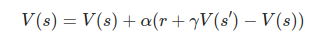


In [ ]:
#for each episode
for i in range(num_episodes):
    
    #initialize the state by resetting the environment
    s = env.reset()
    
    #for every step in the episode
    for t in range(num_timesteps):
        
        #select an action according to random policy
        a = random_policy()
        
        #perform the selected action and store the next state information
        s_, r, done, _ = env.step(a)
        
        #compute the value of the state
        V[s] += alpha * (r + gamma * V[s_]-V[s])
        
        #update next state to the current state
        s = s_
        
        #if the current state is the terminal state then break
        if done:
            break

In [ ]:
df = pd.DataFrame(list(V.items()), columns=['state', 'value'])

In [ ]:
df

As we can observe, now we have the value of all the states and also we can notice that the value of all the terminal states (hole states and goal state) is zero.

Now that we have understood how TD learning can be used for the prediction task, in the next section, we will learn how to use TD learning for the control task.

### TD For Control

#### SARSA

Let's define the dictionary for storing the Q value of the state-action pair and we initialize the Q value of all the state-action pair to 0.0:

In [ ]:
Q = {}
for s in range(env.observation_space.n):
    for a in range(env.action_space.n):
        Q[(s,a)] = 0.0

Now, let's define the epsilon-greedy policy. We generate a random number from the uniform distribution and if the random number is less than epsilon we select the random action else we select the best action which has the maximum Q value:

In [ ]:
def epsilon_greedy(state, epsilon):
    if random.uniform(0,1) < epsilon:
        return env.action_space.sample()
    else:
        return max(list(range(env.action_space.n)), key = lambda x: Q[(state,x)])

In [ ]:
alpha = 0.85
gamma = 0.90
epsilon = 0.8

In [ ]:
num_episodes = 5000
num_timesteps = 1000

C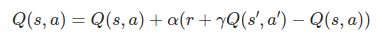ompute the optimal policy using the SARSA update rule as:

In [ ]:
#for each episode
for i in range(20000):
       
    #initialize the state by resetting the environment
    s = env.reset()
    
    #select the action using the epsilon-greedy policy
    a = epsilon_greedy(s,epsilon)
    
    #for each step in the episode:
    for t in range(num_timesteps):

        #perform the selected action and store the next state information: 
        s_, r, done, _ = env.step(a)
        
        #select the action a dash in the next state using the epsilon greedy policy:
        a_ = epsilon_greedy(s_,epsilon) 
        
        #compute the Q value of the state-action pair
        Q[(s,a)] += alpha * (r + gamma * Q[(s_,a_)]-Q[(s,a)])
        
        #update next state to current state
        s = s_
        
        #update next action to current action
        a = a_


        #if the current state is the terminal state then break:
        if done:
            break
     

In [ ]:
import pandas as pd
df = pd.DataFrame(Q.items(),columns=['state_action pair','value'])

Note that on every iteration we update the Q function. After all the iterations, we will have the optimal Q function. Once we have the optimal Q function then we can extract the optimal policy by selecting the action which has maximum Q value in each state.

In [ ]:
df

#### Q Learning

Let's define the dictionary for storing the Q value of the state-action pair and we initialize the Q value of all the state-action pair to 0.0:



In [ ]:
Q = {}
for s in range(env.observation_space.n):
    for a in range(env.action_space.n):
        Q[(s,a)] = 0.0


Now, let's define the epsilon-greedy policy. We generate a random number from the uniform distribution and if the random number is less than epsilon we select the random action else we select the best action which has the maximum Q value:

In [ ]:
def epsilon_greedy(state, epsilon):
    if random.uniform(0,1) < epsilon:
        return env.action_space.sample()
    else:
        return max(list(range(env.action_space.n)), key = lambda x: Q[(state,x)])

In [ ]:
alpha = 0.85
gamma = 0.90
epsilon = 0.8

In [ ]:
num_episodes = 5000
num_steps = 1000

Compute the optimal policy using the Q learning update rule as: 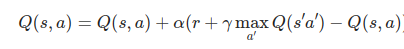

In [ ]:
#for each episode:
for i in range(num_episodes):
    
    #initialize the state by resetting the environment
    s = env.reset()
    
    #for each step in the episode
    for t in range(num_steps):
        
        #select the action using the epsilon-greedy policy
        a = epsilon_greedy(s,epsilon)
        
        #perform the selected action and store the next state information
        s_, r, done, _ = env.step(a)
        
        #first, select the action a dash which has a maximum Q value in the next state
        a_ = np.argmax([Q[(s_, a)] for a in range(env.action_space.n)])
    
        # we calculate the Q value of previous state using our update rule
        Q[(s,a)] += alpha * (r + gamma * Q[(s_,a_)]-Q[(s,a)])
    
        #update current state to next state
        s = s_
        
        #if the current state is the terminal state then break  
        if done:
            break

In [ ]:
import pandas as pd
df = pd.DataFrame(Q.items(),columns=['state_action pair','value'])
df